# Data Analysis of Google App's Ratings

In [1]:
#Import the required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read csv file
dataset = pd.read_csv('/Users/asumankabugo/Desktop/googleplaystore.csv')

In [3]:
# inspect the first 5 rows
dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#number of rows and columns
dataset.shape

(10841, 13)

In [5]:
#summary statistics
dataset.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


The output indicates only one numerical feature, Rating the rest are categorical features. We have a maximum value of 19. to find out whether its an outlier, we use boxplot.

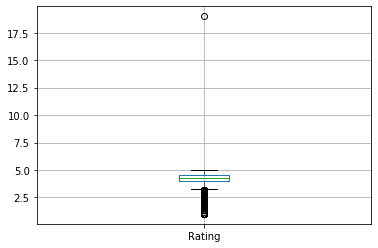

In [6]:
dataset.boxplot()

Output indicates most values are within the range 0f 3 to 5 with an outlier at 19. Then we use the histogram to find out the distribution.

<function matplotlib.pyplot.show(*args, **kw)>

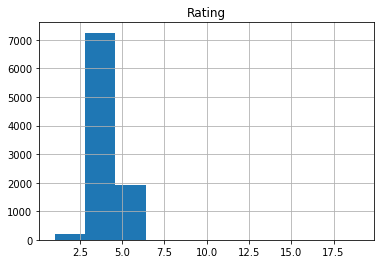

In [7]:
dataset.hist()
plt.show

The output indicates most values are between 3 to 4.5

Then we find out columns with missing values

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


We can observe that Rating, Type, Content Rating, Current Ver, and Android Ver have missing values.

# Data Cleaning

find the number of mising values in each column

In [9]:
#number of missing values
dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

we can observe that Rating has many missing values compared to the other columns which have less than 10 missing values.

Checking the locatinon of outlier in the dataset

In [10]:
dataset[dataset.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We can observe that the outlier is located at 10472. Therefore, we need to drop this oiutlier from the dataset.

In [11]:
dataset.drop([10472],inplace = True)

Find out if the the row was removed from the dataset

In [12]:
dataset[10470:10476]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up


We can observe that row 10472 was removed from the dataset. 

Lets find out using boxplot 

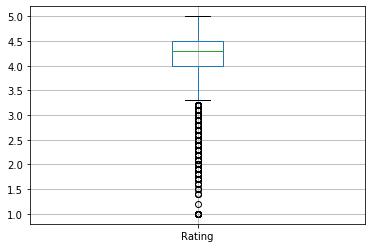

In [13]:
dataset.boxplot()

We can observe that the outliers was removed and most values are concentrated between 3.3 to 5 and a few values between 1 to 3.5.

To analyse the dataset more, we use the histogram to understand the distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff247837690>]],
      dtype=object)

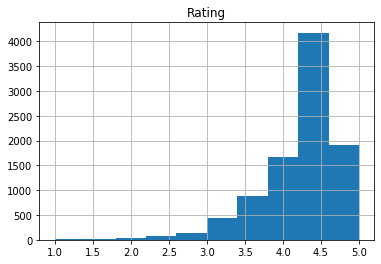

In [14]:
dataset.hist()

We can observe that the dataset is right skewed. Therefore, we will replace the missing data using the median.

# Data Imputation and manipulation

Fill the null values with appropriate values using aggregate functions such as mean, median or mode.

In [15]:
#for numerical variables, we impute using the median
def impute_median(series):
    return series.fillna(series.median())

In [16]:
dataset.Rating = dataset['Rating'].transform(impute_median)

In [17]:
#count the number of null values in each column
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

Output indicates Rating has been filled with median values

In [18]:
# modes of categorical values
print(dataset['Type'].mode())
print(dataset['Current Ver'].mode())
print(dataset['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


Output indicates there are onli unimode values not bimode values.

In [19]:
# Fill the missing categorical values with mode
dataset['Type'].fillna(str(dataset['Type'].mode().values[0]), inplace=True)
dataset['Current Ver'].fillna(str(dataset['Current Ver'].mode().values[0]), inplace=True)
dataset['Android Ver'].fillna(str(dataset['Android Ver'].mode().values[0]), inplace=True)

In [20]:
#count the number of null values in each column
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Output indicates all misiing values have been filled or replaced.

Change Price and Reviews to numerical data

In [21]:
### Let's convert Price and Reviews into Numerical Values
dataset['Price'] = dataset['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
dataset['Price'] = dataset['Price'].apply(lambda x: float(x))
dataset['Reviews'] = pd.to_numeric(dataset['Reviews'], errors='coerce')

In [22]:
#apply the same to Installs
dataset['Installs'] = dataset['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
dataset['Installs'] = dataset['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
dataset['Installs'] = dataset['Installs'].apply(lambda x: float(x))

In [23]:
#inspect the dataset
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Output indicates that Price, Reviews, and Installs have sucessfully been converted

Lets find out the summary statistics of the dataset

In [24]:
dataset.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


The output above shows the four numerical columns.

# Data visualisation

Lets group Ratings, Price and Reviews in terms of Category

In [25]:
grp = dataset.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

Output indicates the values of each category: we can observe the highest and lowest values in terms of Ratings, Reviews and Price.

Lets visualise the groupings

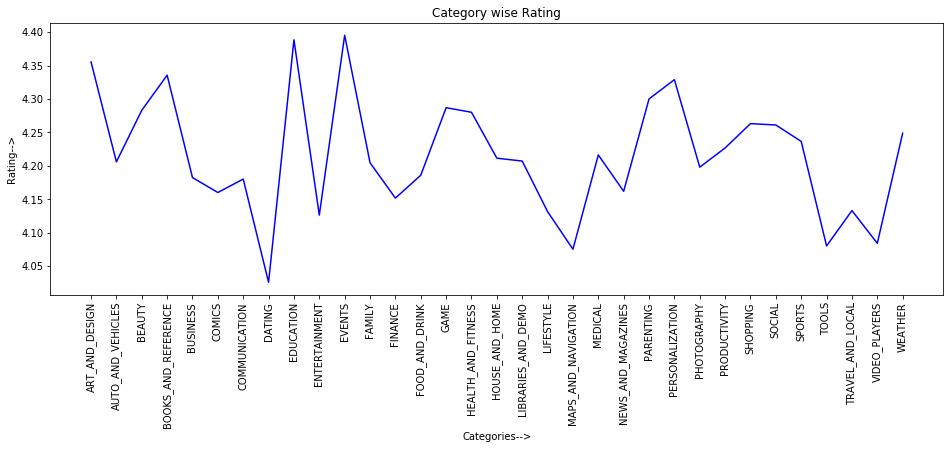

In [26]:
#category X
plt.figure(figsize=(16,5))
plt.plot(x,'r', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

We can observe that EVENTS has the highest Rating followed by EDUCATION and DATING has the lowest Ratings. 


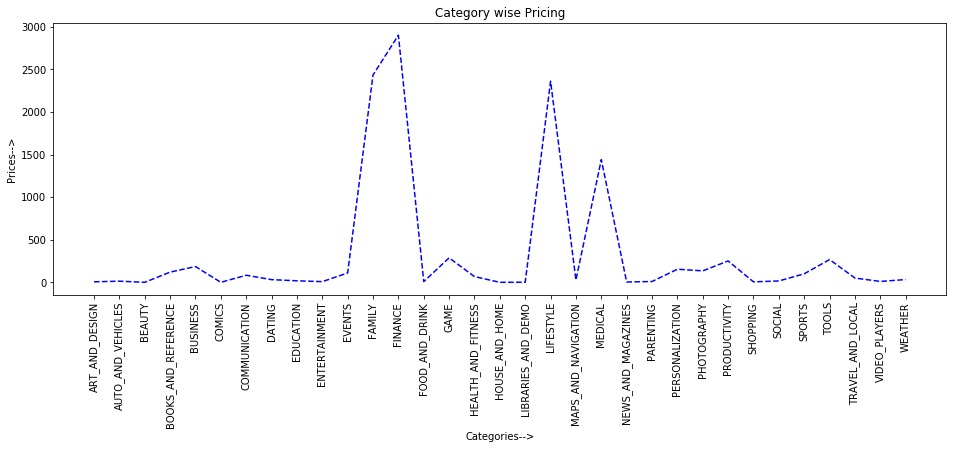

In [27]:
#for Y category
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

We can observe that FINANCE, FAMILY, LIFESTYLE, and MEDICAL were commonly bought with FINANCE making the most money.

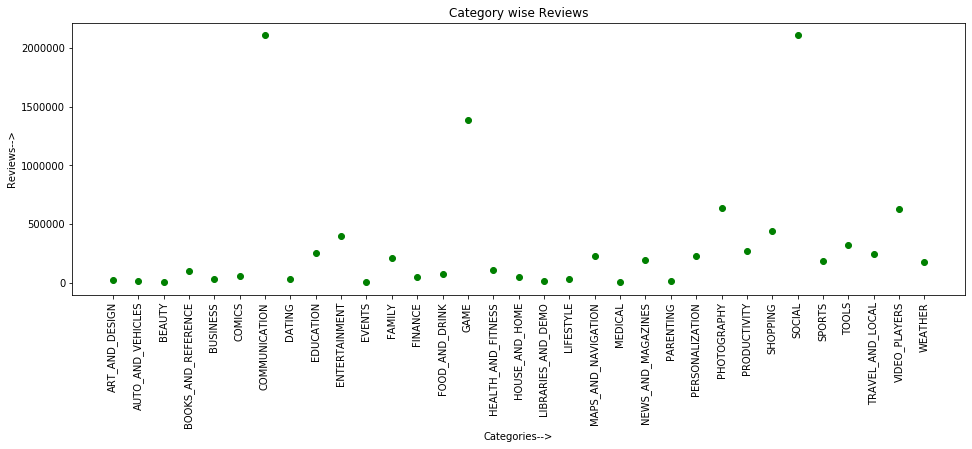

In [28]:
#for Z category
plt.figure(figsize=(16,5))
plt.plot(z,'ro', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()

It can be seen that COMMUNICATION and SOCIAL were Reviewed most followed by GAME and the rest were averagely reviewed.

It can be concluded that the categories have no correlation in regards to Price, Reviews and Ratings.